<a href="https://colab.research.google.com/github/romenlaw/ML-playground/blob/main/ml_playground3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import graphviz
import pandas as pd
import numpy as np

# Native Bayes Model

it's an important ML model used in classification. It's called 'naive' because we make some assumption to simplify the calculation.

It is based on the premise that the more information we gather about an event, the better estimate of the probability we can make. Bayes' theorem answers "what is the prob of Y given X occured?" - *conditional probability*.

* **prior** - the initial probability
* **event** - something that occurs which gives us information
* **posterior** - the final (and more accurate) probability calculated using prior probability and event.

Example:
* Prior: probability that the patient is sick (1/10,000)
* Event: the patient tested positive
* Posterior: probability that the patient is sick given that he is tested positive (99/(99+9999)=0.98%)

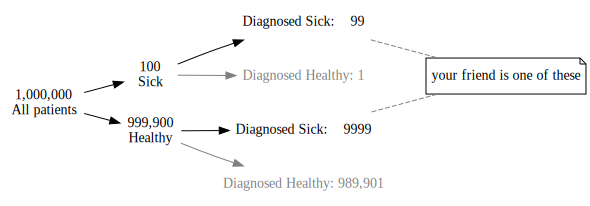

In [ ]:
import graphviz

# Create a new Digraph
dot = graphviz.Digraph(format='svg', graph_attr={'rankdir': 'LR'})

# Add nodes (parent and children)
dot.node('A', '1,000,000\nAll patients', shape='plaintext')
dot.node('S', '100\nSick', shape='plaintext')
dot.node('H', '999,900\nHealthy', shape='plaintext')
dot.node('SDS', 'Diagnosed Sick:    99', shape='plaintext')
dot.node('SDH', 'Diagnosed Healthy: 1', shape='plaintext', fontcolor='grey')
dot.node('HDS', 'Diagnosed Sick:    9999', shape='plaintext')
dot.node('HDH', 'Diagnosed Healthy: 989,901', shape='plaintext', fontcolor='grey')

# Add edges (connections)
dot.edge('A', 'S')
dot.edge('A', 'H')
dot.edge('S', 'SDS')
dot.edge('S', 'SDH', color='grey')
dot.edge('H', 'HDS')
dot.edge('H', 'HDH', color='grey')

dot.node('F', 'your friend is one of these', shape='note')
dot.edge('SDS', 'F', style='dashed', color='grey', arrowhead='none')
dot.edge('HDS', 'F', style='dashed', color='grey', arrowhead='none')
# Display the diagram
dot

In [ ]:
99/(99+9999)  # prob of friend is sick

0.00980392156862745

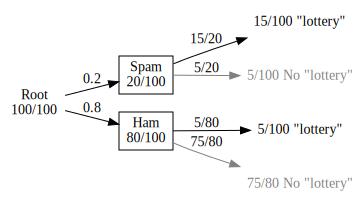

In [ ]:
# the spam email example
g = graphviz.Digraph(format='svg', graph_attr={'rankdir': 'LR'})
g.node('R', 'Root\n100/100', shape='plaintext')
g.node('S', 'Spam\n20/100', shape='box')
g.node('H', 'Ham\n80/100', shape='box')
g.node('SL', '15/100 "lottery"', shape='plaintext')
g.node('SNL', '5/100 No "lottery"', shape='plaintext', fontcolor='grey')
g.node('HL', '5/100 "lottery"', shape='plaintext')
g.node('HNL', '75/80 No "lottery"', shape='plaintext', fontcolor='grey')

g.edge('R', 'S', label='0.2'); g.edge('R', 'H', label='0.8')
g.edge('S', 'SL', label='15/20'); g.edge('S', 'SNL', label='5/20', color='grey')
g.edge('H', 'HL', label='5/80'); g.edge('H', 'HNL', label='75/80', color='grey')

g

After eliminating the tree nodes with 'No "lottery"', we calculate the probability that an email is spam given that it contains the word 'lottery' is 15/20=0.75

**Question**: what is the prob that an email that contains the word 'lottery' is spam?

**Rule of complementary probabilities**: For an event E, the complement of event E (denoted $E^c$) is the event opposite to E. The prob of $E^c$ is 1 minus the prob of E:
$$P(E^c)=1-P(E)$$

as an example, P(spam)=20%, P(ham)=1-P(spam)=80%

another example: The prob that a spam email contains 'lottery' is 15/20=0.75. This can be read as: the prob that an email contains 'lottery' given that it's a spam, is 0.75.
* $P('lottery'|spam)=0.75$ : the probability that a spam email contains the word *lottery*
* $P(no 'lottery'|spam)=1-0.75=0.25$ : the probability that a spam email does not contain the word *lottery*.
* $P('lottery'|ham)=\frac{5}{80}=0.0625$ : the probability that a ham email contains the word *lottery*
* $P(no 'lottery'|ham)=1-0.0625=0.9375$ : the probability that a ham email contains the word *lottery*

**Product rule of probabilities** For events E and F, the probability of their intersection is the product of the conditional probability of F given E, times the probability of F, namely,
$$P(E \cap F) = P(E | F) \cap P(F)$$


i.e. we find the probs of 2 events happening at the same time by multiplying the two probs:
1. $P('lottery' \cap spam)=P(spam)\cap P('lottery'|spam)=0.2 \times 0.75 = 0.15$ : The probability that *and* email is spam and contains the word lottery
2. $P(no 'lottery' \cap spam)=P(no 'lottery'|spam)\cap P(spam)=0.25\times 0.2=0.05$ : The probability that *and* email is spam and does not contain the word lottery
3. $P('lottery' \cap ham) = P('lottery'|ham) \cap P(ham)=0.0625\times0.8=0.05$ : The probability that *and* email is ham and contains the word lottery
4. $P(no 'lottery' \cap ham)=P(no 'lottery'|ham)\cap P(ham)=0.9375\times0.8=0.75$ : The probability that *and* email is ham and does not contain the word lottery

The sum of above 4 probs is 1 because they are all the possible scenarios.

Now we want to find $P(spam|'lottery')=?$, i.e. prob that email is spam, given that it contains the word 'lottery'.

From above list, there are 2 scenarios that contain the word 'lottery': $P('lottery' \cap spam)$ and $P('lottery' \cap ham)$, i.e. we only need to consider these 2 branches of the tree. The ratio between the 2 scenarios is 3:1 and they should add up to 1 (because our whole population is emails with 'lottery' only). So
* $P(spam|'lottery')=\frac{P('lottery'\cap spam)}{P('lottery'\cap spam)+P('lottery'\cap ham)}=\frac{0.15}{0.15+0.05}=3/4=0.75$
* $P(ham|'lottery')=\frac{P('lottery'\cap ham)}{P('lottery'\cap ham)+P('lottery'\cap spam)}=\frac{0.05}{0.05+0.15}=1/4=.25$

**Bayes theorum** for events E and F
$$P(E|F)=\frac{P(F|E)\cdot P(E)}{P(F)}
$$
Because event F can be broken down to 2 disjoint events $F|E$ and $F|E^c$, then
$$P(E|F)=\frac{P(F|E)\cdot P(E)}{P(F|E)\cdot P(E)+P(F|E^c)\cdot P(E^c)}
$$

Using Bayes theorum to find P(spam|'lottery'):

$P(spam|'lottery')=\frac{P('lottery'|spam)\cdot P('lottery')}{P('lottery'|spam)\cdot P(spam)+P('lottery'|ham)\cdot P(ham)}
= \frac{0.75\times (\frac{15}{100}+\frac{5}{100})}{0.75\times 0.2+0.0625\times 0.8} = \frac{0.75\times 0.2}{0.75\times 0.2+0.0625\times 0.8} = \frac{0.15}{0.15+0.05} = 0.75
$

## Two events

The above looks at single word 'lottery' in email, What about two words, i.e. two events?

If two events are independent, then the prob of both of them occuring is the product of their probs. But some cases the events are not independent - e.g. gender, eye color, but we can assume they are, hence *naive* Bayes...

**product rule for independent probabilities**:
$$P(E\cap F) = P(E)\cdot P(F)
$$

**naiive assumption**: the two events E and F are independent. Sometimes this assumption is not true - e.g. words 'salt' and 'pepper' appear in the same email...

In [2]:
# example, let's say the stats for the word 'sale' in emails are:
# P('sale'|spam) = 6/20; P('sale'|ham)=4/80
P_sale_spam = 6/20
P_sale_ham = 4/80
# from previous example we know
P_lottery_spam = 15/20
P_lottery_ham = 5/80

# calc P('lottery', 'sale' | spam)
# i.e. prob of a spam email containing both words
P_2_spam = P_lottery_spam * P_sale_spam
print("P('lotter', 'sale'|spam)=", P_2_spam)

# calc P('lottery', 'sale'|ham)
# i.e. prob of a ham email containing both words
P_2_ham = P_lottery_ham * P_sale_ham
print("P('lottery', 'sale'|ham)=", P_2_ham)

P('lotter', 'sale'|spam)= 0.22499999999999998
P('lottery', 'sale'|ham)= 0.003125


In [4]:
# if we restrict our population to emails containg both words only, i.e.
population = 20 * P_2_spam + 80 * P_2_ham
print("number emails containing both words: ", population)

# and calculate prob of spam in this population, i.e. P(spam|lottery AND sale)
P_spam_2 = 20 * P_2_spam / population
print("P(spam | lottery \cap sale)=", P_spam_2)

number emails containing both words:  4.75
P(spam | lottery \cap sale)= 0.9473684210526315


## Multiple events

Extend the above to multiple events: e.g. the email has n words x1, x2, ... xn, Bayes' theorom states that the prob of an email being spam given that it contains words x1, x2, ... xn is (comma is used the same as $\cap$:
$$P(spam|x_1, x_2, \ldots, x_n) = \frac{P(x_1, x_2, \ldots, x_n|spam)P(spam)}{P(x_1, x_2, \ldots, x_n|spam)P(spam)+P(x_1, x_2, \ldots, x_n|ham)P(ham)}
$$
Assuming all words are independent, we get

$P(x_1, x_2, \ldots, x_n|spam) = P(x_1|spam)\cdot P(x_2|spam) \ldots P(x_n|spam)$

and

$P(x_1, x_2, \ldots, x_n|ham) = P(x_1|ham)\cdot P(x_2|ham) \ldots P(x_n|ham)$

substitute them into the first equation:
$$P(spam|x_1, x_2, \ldots, x_n) = \frac{P(x_1|spam)\cdot P(x_2|spam) \ldots P(x_n|spam)P(spam)}{P(x_1|spam)\cdot P(x_2|spam) \ldots P(x_n|spam)P(spam)+P(x_1|ham)\cdot P(x_2|ham) \ldots P(x_n|ham)P(ham)}
$$


## Spam detection example

In [5]:
!rm -f data/emails.csv
!wget -nv -P data https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_08_Naive_Bayes/emails.csv
!ls -al data
!wc -l data/emails.csv

2025-02-24 23:43:30 URL:https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_08_Naive_Bayes/emails.csv [8954755/8954755] -> "data/emails.csv" [1]
total 8756
drwxr-xr-x 2 root root    4096 Feb 24 23:43 .
drwxr-xr-x 1 root root    4096 Feb 24 23:43 ..
-rw-r--r-- 1 root root 8954755 Feb 24 23:43 emails.csv
5729 data/emails.csv


In [24]:
emails = pd.read_csv('data/emails.csv')
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [13]:
# preprocess data
def process_email(text): # text is individual email record
  text = text.lower()
  return list(set(text.split())) # return list of unique words

text = process_email(emails["text"][0])
len(text), text[:10]

(139,
 ['more',
  'its',
  'are',
  'for',
  'iogo',
  'at',
  'ciear',
  'promptness',
  'gaps',
  'website'])

In [15]:
# add another column in dataframe to store the list of unique words
emails['words'] = emails['text'].apply(process_email)

# finding the priors
sum(emails['spam']) / len(emails)

0.2388268156424581

In [16]:
# finding the posteriors with Bayes' theorom
# this is equivalent to training the model
model = {} # stores spam and ham counts for each word
for idx, email in emails.iterrows():
  for word in email['words']:
    if word not in model:
      model[word] = {'spam':1, 'ham':1} # note, counts are init to 1 to avoid divid by 0
    if email['spam']:
      model[word]['spam'] += 1
    else:
      model[word]['ham'] += 1

In [25]:
model['lottery'], model['sale'], model['click']

({'spam': 9, 'ham': 1}, {'spam': 39, 'ham': 42}, {'spam': 330, 'ham': 147})

In [29]:
# P(spam | word)
def predict_bayes(word):
    word = word.lower()
    num_spam_with_word = model[word]['spam']
    num_ham_with_word = model[word]['ham']
    return 1.0*num_spam_with_word/(num_spam_with_word + num_ham_with_word)

In [47]:
predict_bayes('lottery'), predict_bayes('sale'), predict_bayes('him'), predict_bayes('her')

(0.9, 0.48148148148148145, 0.05699481865284974, 0.24107142857142858)

In [53]:
def predict_naive_bayes(email):
  total = len(emails)
  num_spam = sum(emails['spam'])
  num_ham = total - num_spam
  words = process_email(email)
  spams = [1.0]
  hams = [1.0]
  for word in words:
    if word in model:
      # calc P(word|spam) and P(word|ham)
      spams.append(model[word]['spam']/num_spam ) #* total)
      hams.append(model[word]['ham']/num_ham )#* total)

  prod_spams = np.prod(spams) * num_spam / total # num_spam/total is P(spam)
  prod_hams = np.prod(hams) * num_ham / total # num_ham/total is P(ham)

  return prod_spams / (prod_spams + prod_hams)

In [64]:
# words that don't exist in the model gets the prior (sum(emails['spam']) / len(emails))
predict_naive_bayes('蛇年大吉')

0.2388268156424581

In [54]:
predict_naive_bayes('great lottery opportunity, send me the money now')

0.9722510815977699

In [55]:
predict_naive_bayes('hi mum, how are you? I will be late tonight')

0.002394570947765674

In [60]:
predict_naive_bayes('The LCD displays INFO. Can you please check if its working OK?')

0.01959701915531569

In [63]:
predict_naive_bayes("are your contact details up to date? To update your details, please call us on 132 022 or go to westpac.com.au")

0.07086513220150273

In [59]:
msg="""Join an instructor-led virtual hands-on lab on Wednesday, March 12 delivered live by our AI data experts. Discover how to govern data and apps across different sources and formats in Snowflake Horizon through a unified set of capabilities.

Free Hands-on Lab

Ask the Expert

Live and Local

Learning outcomes:
•	Classifying, tagging and applying granular policies to sensitive data
•	Monitoring data quality and visualising lineage
•	Applying data privacy features
•	Discovering and securely sharing content

Who should attend:
Virtual Hands-On Labs sessions cater to individuals ranging from beginners to those with extensive experience in using Snowflake. This includes IT Managers, Data Architects, Engineers, Scientists, Administrators, and Developers.

We look forward to engaging with you!
"""
predict_naive_bayes(msg)

0.9983483553452716

# Decision Trees

**depth**: number of branches on the longest path.

Decision trees can be used for classification and regression. For regression, the leaf nodes have values.

**sum rule for disjoint posibilities** if events E and F are disjoint (cannot occur at the same time), then the prob of either one of them happening (the union of events) is the sum of their probs:
$$P(E \cup F)=P(E)+P(F)
$$

**Gini Impurity Index** or *Gini index* measures how diverse is the dataset - the bigger the value, the more diverse. In a set with $m$ elements and $n$ classes, with $a_i$ elements belonging to the $i$-th class, the Gini impurity index is
$$Gini = 1-p_1^2-p_2^2\ldots -p_n^2 \text { , where } p_i=\frac{a_i}{m}
$$


In [67]:
# Gini example
# set 1 has 8 red balls, two blue balls
set1=['red']*8+['blue']*2
m=8+2
p_red = 8/10
p_blue = 2/10
gini = 1 - p_red**2 - p_blue**2
gini

0.31999999999999984

In [69]:
# set 2 has 4 red, 3 blue, 2 yellow, 1 green
set2 = ['red']*4 + ['blue']*3 + ['yellow']*2 + ['green']
m = len(set2)
p_red = 4/m
p_blue = 3/m
p_yellow = 2/m
p_green = 1/m
gini = 1-p_red**2 - p_blue**2 - p_yellow**2 - p_green**2
gini

0.7